# **Hands-on Activity 11.2 Classification using Logistic Regression**
**Name:** John Rome A. Belocora  
**Section:** CPE22S3  
**Date:** 04/28/2024  
**Teacher:** Engr. Roman Richard

In [112]:
pip install ucimlrepo

In [113]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cervical_cancer_risk_factors = fetch_ucirepo(id=383)

# data (as pandas dataframes)
X = cervical_cancer_risk_factors.data.features
y = cervical_cancer_risk_factors.data.targets

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
df = pd.concat([X,y])
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


# **Data Wrangling**

In [116]:
# Identifying the Unique values of each columns
for columns in df:
  print(columns)
  print(df[columns].unique())
  print('  ')

Age
[18 15 34 52 46 42 51 26 45 44 27 43 40 41 39 37 38 36 35 33 31 32 30 23
 28 29 20 25 21 24 22 48 19 17 16 14 59 79 84 47 13 70 50 49]
  
Number of sexual partners
[ 4.  1.  5.  3.  2.  6. nan  7. 15.  8. 10. 28.  9.]
  
First sexual intercourse
[15. 14. nan 16. 21. 23. 17. 26. 20. 25. 18. 27. 19. 24. 32. 13. 29. 11.
 12. 22. 28. 10.]
  
Num of pregnancies
[ 1.  4.  2.  6.  3.  5. nan  8.  7.  0. 11. 10.]
  
Smokes
[ 0.  1. nan]
  
Smokes (years)
[ 0.         37.         34.          1.26697291  3.         12.
         nan 18.          7.         19.         21.         15.
 13.         16.          8.          4.         10.         22.
 14.          0.5        11.          9.          2.          5.
  6.          1.         32.         24.         28.         20.
  0.16      ]
  
Smokes (packs/year)
[0.00000000e+00 3.70000000e+01 3.40000000e+00 2.80000000e+00
 4.00000000e-02 5.13202128e-01 2.40000000e+00 6.00000000e+00
            nan 9.00000000e+00 1.60000000e+00 1.90000000e+01


As we can see above there are some columns which only consist values of 0, 1 and nan, this means that 0 stands for "False" or "No", 1 stands for "True" or "Yes" and nan means that there are missing values. While on the other hand there are some columns that consists several unique values. We can also notice the column "STDs:AIDS" and "STDs:cervical condylomatosis" which consist values of only "0" and "nan" this means that they dont have any value contribution to the dataset so we can drop those columns.

# **Dropping Columns**

In [117]:
# Dropping the STDs:AIDS and STDs:cervical condylomatosis column
df = df.drop(columns=['STDs:AIDS','STDs:cervical condylomatosis'])
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


# **Identifying numerical datatypes**

In [118]:
# Checking for columns that are not object datatype
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 34 numerical variables

The numerical variables are : ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']


# **Identifying Outliers in Numerical Variables**

In [119]:
sample = df.copy()

In [120]:
# View summary statistics in numerical variables
print(round(sample[numerical].describe()),2)

         Age  Number of sexual partners  First sexual intercourse  \
count  858.0                      832.0                     851.0   
mean    27.0                        3.0                      17.0   
std      8.0                        2.0                       3.0   
min     13.0                        1.0                      10.0   
25%     20.0                        2.0                      15.0   
50%     25.0                        2.0                      17.0   
75%     32.0                        3.0                      18.0   
max     84.0                       28.0                      32.0   

       Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
count               802.0   845.0           845.0                845.0   
mean                  2.0     0.0             1.0                  0.0   
std                   1.0     0.0             4.0                  2.0   
min                   0.0     0.0             0.0                  0.0   
25%     

As we can see in the results above, I think the 'Age', 'First sexual intercourse', 'STDs: Time since first diagnosis', and 'STDs: Time since last diagnosis' columns may contain outliers because of their shown result. To confirm this, we can use boxplots to visualize outliers

**Using Boxplots to visualize outliers**

Text(0, 0.5, 'STDs: Time since last diagnosis')

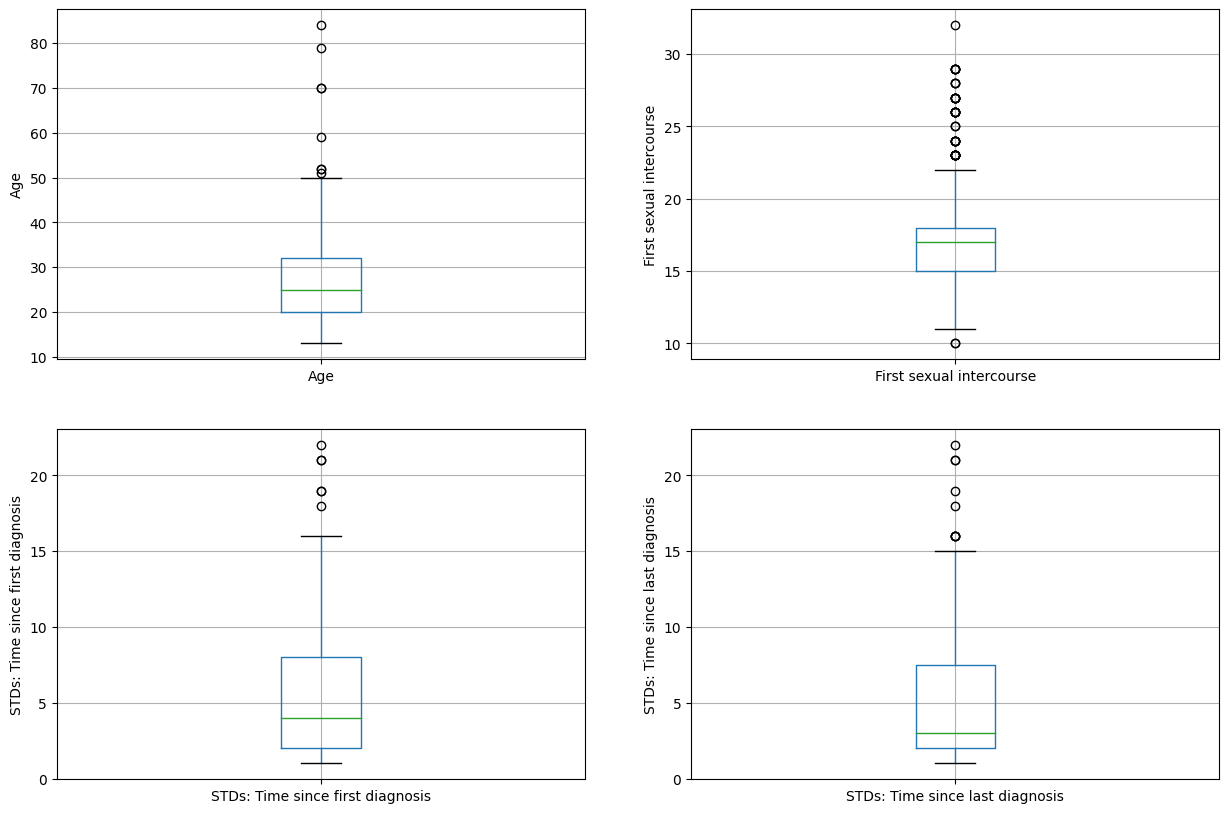

In [121]:
#Using Boxplots to visualize outliers
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = sample.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')

plt.subplot(2, 2, 2)
fig = sample.boxplot(column='First sexual intercourse')
fig.set_title('')
fig.set_ylabel('First sexual intercourse')

plt.subplot(2, 2, 3)
fig = sample.boxplot(column='STDs: Time since first diagnosis')
fig.set_title('')
fig.set_ylabel('STDs: Time since first diagnosis')

plt.subplot(2, 2, 4)
fig = sample.boxplot(column='STDs: Time since last diagnosis')
fig.set_title('')
fig.set_ylabel('STDs: Time since last diagnosis')

As we can notice in the boxplot results, we can confirm that there really are outliers in these variables.

# **Checking the Distribution of Variables**
We can use histograms to check the distributions of variables and identify if they are normal or skewed.

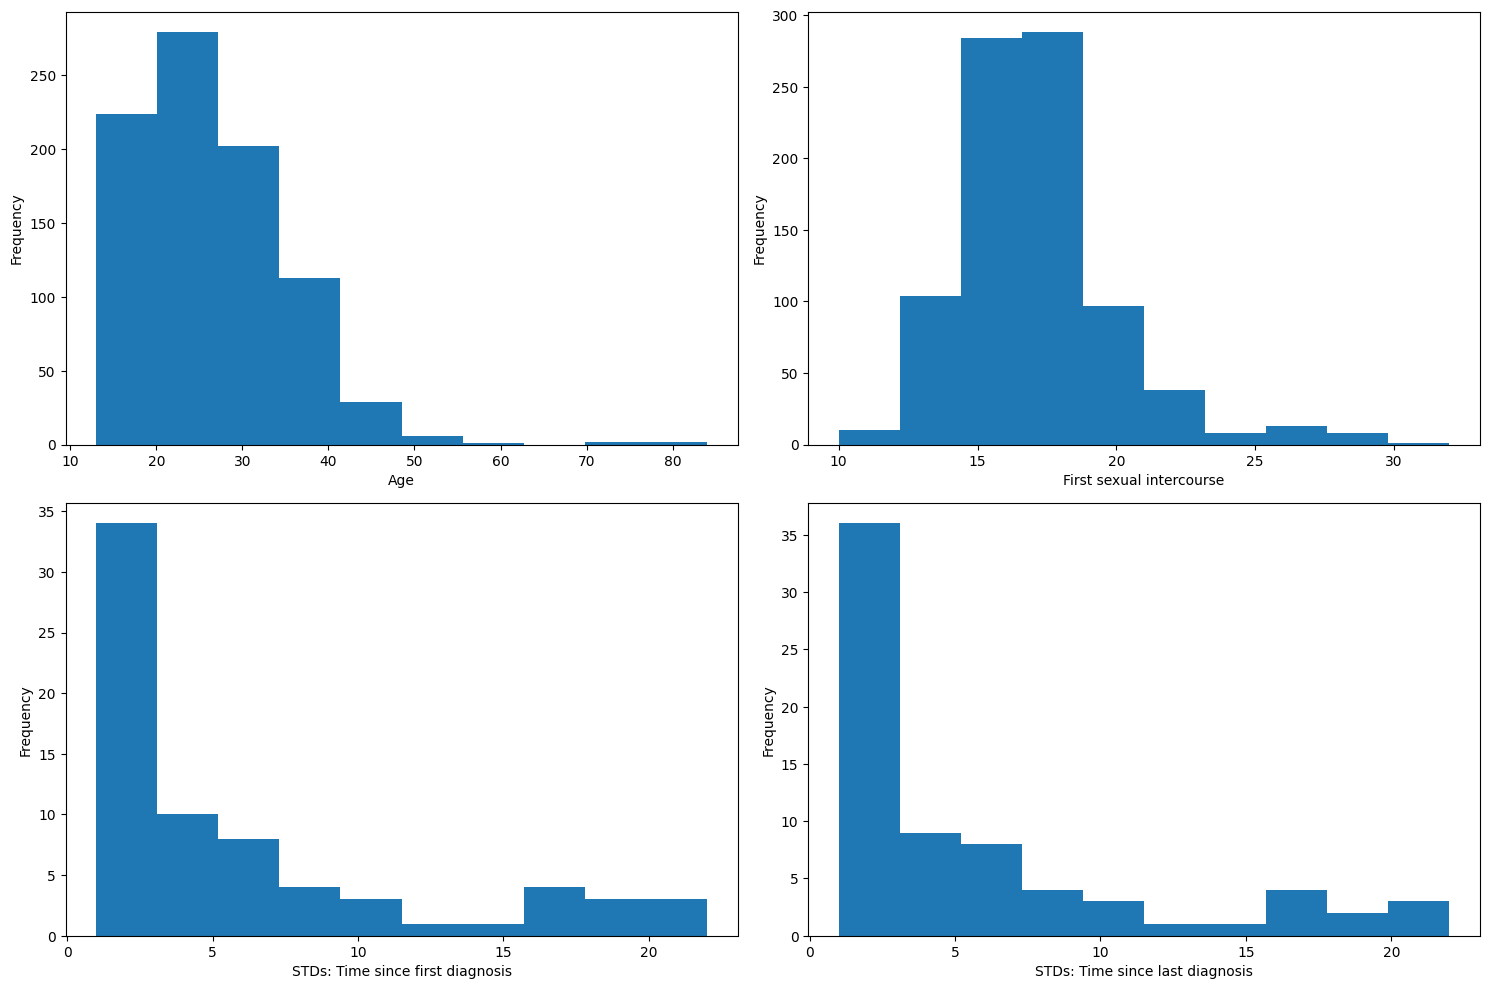

In [122]:
#Using plot histogram to check distribution
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.hist(sample['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(sample['First sexual intercourse'], bins=10)
plt.xlabel('First sexual intercourse')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(sample['STDs: Time since first diagnosis'], bins=10)
plt.xlabel('STDs: Time since first diagnosis')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(sample['STDs: Time since last diagnosis'], bins=10)
plt.xlabel('STDs: Time since last diagnosis')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Base on the result of our histogram, we can notice that all the four variables are skewed. Therefore we can use interquartile range to find outliers.

**First Sexual Intercourse Outliers**

In [123]:
# Finding outliers for First sexual intercourse variable
IQR = sample['First sexual intercourse'].quantile(0.75) - sample['First sexual intercourse'].quantile(0.25)
Lower_fence = sample['First sexual intercourse'].quantile(0.25) - (IQR * 3)
Upper_fence = sample['First sexual intercourse'].quantile(0.25) + (IQR * 3)
print('First sexual intercourse outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

First sexual intercourse outliers are values < 6.0 or > 24.0


**Age Outliers**

In [124]:
# Finding outliers for Age variable
IQR = sample['Age'].quantile(0.75) - sample['Age'].quantile(0.25)
Lower_fence = sample['Age'].quantile(0.25) - (IQR * 3)
Upper_fence = sample['Age'].quantile(0.25) + (IQR * 3)
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Age outliers are values < -16.0 or > 56.0


**STDs: Time since first diagnosis Outliers**

In [125]:
# Finding outliers for STDs: Time since first diagnosis variable
IQR = sample['STDs: Time since first diagnosis'].quantile(0.75) - sample['STDs: Time since first diagnosis'].quantile(0.25)
Lower_fence = sample['STDs: Time since first diagnosis'].quantile(0.25) - (IQR * 3)
Upper_fence = sample['STDs: Time since first diagnosis'].quantile(0.25) + (IQR * 3)
print('STDs: Time since first diagnosis outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

STDs: Time since first diagnosis outliers are values < -16.0 or > 20.0


**STDs: Time since last diagnosis Outliers**

In [126]:
# Finding outliers for STDs: Time since last diagnosis variable
IQR = sample['STDs: Time since last diagnosis'].quantile(0.75) - sample['STDs: Time since last diagnosis'].quantile(0.25)
Lower_fence = sample['STDs: Time since last diagnosis'].quantile(0.25) - (IQR * 3)
Upper_fence = sample['STDs: Time since last diagnosis'].quantile(0.25) + (IQR * 3)
print('STDs: Time since last diagnosis outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

STDs: Time since last diagnosis outliers are values < -14.5 or > 18.5


# **Declare feature vector and target variable**
We are going to use the number of pregnancies as our target variable

In [127]:
X = sample.drop(['Num of pregnancies'], axis=1)
y = sample['Num of pregnancies']

# **Split data into separate training and test set**

In [128]:
# Split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=0)

In [129]:
# Check the shape of X_train and X_test
X_train.shape, X_test.shape

((772, 33), (86, 33))

In [130]:
# Check the shape of y_train and y_test
y_train.shape, y_test.shape

((772,), (86,))

# **Feature Engineering**

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predicitve power. I will carry out feature engineering on different types of variables.

In [131]:
# Displaying Numerical Variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['Age',
 'Number of sexual partners',
 'First sexual intercourse',
 'Smokes',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives',
 'Hormonal Contraceptives (years)',
 'IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis',
 'STDs: Time since first diagnosis',
 'STDs: Time since last diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'Hinselmann',
 'Schiller',
 'Citology',
 'Biopsy']

**We can clearly see that all of our Columns are Numerical datatypes**

# **Engineering missing values in numerical variables**

In [132]:
# Checking missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Smokes                                 12
Smokes (years)                         12
Smokes (packs/year)                    12
Hormonal Contraceptives                98
Hormonal Contraceptives (years)        98
IUD                                   104
IUD (years)                           104
STDs                                   94
STDs (number)                          94
STDs:condylomatosis                    94
STDs:vaginal condylomatosis            94
STDs:vulvo-perineal condylomatosis     94
STDs:syphilis                          94
STDs:pelvic inflammatory disease       94
STDs:genital herpes                    94
STDs:molluscum contagiosum             94
STDs:HIV                               94
STDs:Hepatitis B                       94
STDs:HPV                               94
STDs: Number of diagnosis               0
STDs: Time since first diagnosis  

In [133]:
# Print percentage of missing values in the numerical variables in training set

for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col,':', round(X_train[col].isnull().mean(),4),'%')

Number of sexual partners : 0.0337 %
First sexual intercourse : 0.0091 %
Smokes : 0.0155 %
Smokes (years) : 0.0155 %
Smokes (packs/year) : 0.0155 %
Hormonal Contraceptives : 0.1269 %
Hormonal Contraceptives (years) : 0.1269 %
IUD : 0.1347 %
IUD (years) : 0.1347 %
STDs : 0.1218 %
STDs (number) : 0.1218 %
STDs:condylomatosis : 0.1218 %
STDs:vaginal condylomatosis : 0.1218 %
STDs:vulvo-perineal condylomatosis : 0.1218 %
STDs:syphilis : 0.1218 %
STDs:pelvic inflammatory disease : 0.1218 %
STDs:genital herpes : 0.1218 %
STDs:molluscum contagiosum : 0.1218 %
STDs:HIV : 0.1218 %
STDs:Hepatitis B : 0.1218 %
STDs:HPV : 0.1218 %
STDs: Time since first diagnosis : 0.9145 %
STDs: Time since last diagnosis : 0.9145 %


We can use Mode imputation to fill missing values that we have in our columns

In [134]:
# Impute missing values in X_train and X_test with respective column mode in X_train
for sample in [X_train, X_test]:
    for col in numerical:
        col_mode = X_train[col].mode()[0]  # Extract mode value
        sample[col].fillna(col_mode, inplace=True)

# Check again missing values in numerical variables in X_train
X_train[numerical].isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
STDs: Time since first diagnosis      0
STDs: Time since last diagnosis       0


# **Engineering Outliers in Numerical Variables**
Since we have seen in our previous identifying outliers that "Age", "First sexual intercourse", "STDs: Time since first diagnosis", and "STDs: Time since last diagnosis" columns contain outliers. We can use top coding approach to cap maximum values and remove outliers from the above variables

In [135]:
def max_value(sample, variable, top):
    return np.where(sample[variable]>top, top, sample[variable])

for sample in [X_train, X_test]:
    sample['Age'] = max_value(sample, 'Age', 56)
    sample['First sexual intercourse'] = max_value(sample, 'First sexual intercourse', 24)
    sample['STDs: Time since first diagnosis'] = max_value(sample, 'STDs: Time since first diagnosis', 20)
    sample['STDs: Time since last diagnosis'] = max_value(sample, 'STDs: Time since last diagnosis', 18.5)

Maximum cap value for the Age

In [136]:
X_train['Age'].max(), X_test['Age'].max()

(56, 56)

Maximum cap value for the First sexual intercourse

In [137]:
X_train['First sexual intercourse'].max(), X_test['First sexual intercourse'].max()

(24.0, 24.0)

Maximum cap value for the STDs: Time since first diagnosis

In [138]:
X_train['STDs: Time since first diagnosis'].max(), X_test['STDs: Time since first diagnosis'].max()

(20.0, 11.0)

Maximum cap value for the STDs: Time since last diagnosis

In [139]:
X_train['STDs: Time since last diagnosis'].max(), X_test['STDs: Time since last diagnosis'].max()

(18.5, 11.0)

Now we can see that the outliers in Age, First sexual intercourse, STDs: Time since first diagnosis, and STDs: Time since last diagnosis are now capped.

In [140]:
X_train[numerical].describe()

,Age,Number of sexual partners,First sexual intercourse,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,26.699482,2.522021,16.847150,0.148964,1.233676,0.473064,0.687824,1.963163,0.091969,0.427642,...,1.435233,1.398964,0.022021,0.010363,0.022021,0.028497,0.042746,0.088083,0.046632,0.064767
std,7.990289,1.681757,2.486269,0.356284,4.046712,2.304001,0.463682,3.496010,0.289169,1.816494,...,2.228736,2.077649,0.146846,0.101334,0.146846,0.166497,0.202415,0.283599,0.210986,0.246274
min,14.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.500000,2.000000,17.000000,0.000000,0.000000,0.000000,1.000000,0.250000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,56.000000,28.000000,24.000000,1.000000,37.000000,37.000000,1.000000,22.000000,1.000000,19.000000,...,20.000000,18.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Feature Scaling**

In [141]:
cols = X_train.columns

In [142]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [143]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [144]:
X_test = pd.DataFrame(X_train, columns=[cols])

In [145]:
X_train.describe()

,Age,Number of sexual partners,First sexual intercourse,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,0.302369,0.056371,0.489082,0.148964,0.033343,0.012786,0.687824,0.089235,0.091969,0.022507,...,0.022907,0.022798,0.022021,0.010363,0.022021,0.028497,0.042746,0.088083,0.046632,0.064767
std,0.190245,0.062287,0.177591,0.356284,0.109371,0.062270,0.463682,0.158910,0.289169,0.095605,...,0.117302,0.118723,0.146846,0.101334,0.146846,0.166497,0.202415,0.283599,0.210986,0.246274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.037037,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.273810,0.037037,0.500000,0.000000,0.000000,0.000000,1.000000,0.011364,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.428571,0.074074,0.571429,0.000000,0.000000,0.000000,1.000000,0.090909,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now we can use X_train dataset to be fed into the Logistic Regression classifier.

# **Model Training**

In [146]:
from sklearn.linear_model import LogisticRegression

# Handle missing values in y_train
y_train_mode = y_train.mode()[0]
y_train.fillna(y_train_mode, inplace=True)

# Instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)

# Fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

# **Predict Results**

In [147]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([1., 1., 1., 1., 1., 3., 1., 1., 3., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 3.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1.,
       1., 3., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 2., 3., 1., 1., 1., 1., 2., 3., 1., 2., 1., 2., 2., 1., 3.,
       1., 1., 1., 3., 3., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1.,
       1., 3., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1.,
       2., 1., 1., 3., 2., 1., 3., 1., 1., 1., 2., 1., 3., 1., 1., 1., 1.,
       1., 3., 3., 4., 1., 3., 1., 1., 4., 2., 1., 1., 3., 1., 1., 1., 2.,
       3., 2., 3., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1.,
       2., 2., 1., 1., 4., 1., 3., 1., 1., 1., 1., 1., 1., 2., 3., 1., 1.,
       1., 1., 6., 1., 1., 1., 2., 2., 1., 4., 3., 1., 1., 1., 1., 3., 3.,
       2., 3., 4., 2., 1., 1., 3., 1., 1., 2., 3., 1., 3., 3., 2., 1., 1.,
       1., 1., 1., 1., 1.

Using the predict_proba method gives the probabilities for the target variable(0 and 1) in this case, in array form.

In [148]:
logreg.predict_proba(X_test)[:0]

array([], shape=(0, 10), dtype=float64)

Comparing the train-set and test-set accuracy

In [149]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([1., 1., 1., 1., 1., 3., 1., 1., 3., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 3.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1.,
       1., 3., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 2., 3., 1., 1., 1., 1., 2., 3., 1., 2., 1., 2., 2., 1., 3.,
       1., 1., 1., 3., 3., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1.,
       1., 3., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1.,
       2., 1., 1., 3., 2., 1., 3., 1., 1., 1., 2., 1., 3., 1., 1., 1., 1.,
       1., 3., 3., 4., 1., 3., 1., 1., 4., 2., 1., 1., 3., 1., 1., 1., 2.,
       3., 2., 3., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1.,
       2., 2., 1., 1., 4., 1., 3., 1., 1., 1., 1., 1., 1., 2., 3., 1., 1.,
       1., 1., 6., 1., 1., 1., 2., 2., 1., 4., 3., 1., 1., 1., 1., 3., 3.,
       2., 3., 4., 2., 1., 1., 3., 1., 1., 2., 3., 1., 3., 3., 2., 1., 1.,
       1., 1., 1., 1., 1.

# **Adjusting the threshold level**

In [150]:
# Print the first 10 predicted probabilities of two classes 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]
y_pred_prob

array([[0.04188835, 0.532543  , 0.2244629 , 0.06786815, 0.05248675,
        0.0294429 , 0.01443772, 0.01247229, 0.01167408, 0.01272387],
       [0.01535045, 0.53870398, 0.34749322, 0.01826545, 0.04685889,
        0.00649316, 0.00997605, 0.00417704, 0.00743674, 0.00524502],
       [0.01120946, 0.50742119, 0.27248145, 0.11989395, 0.0356421 ,
        0.02579906, 0.01097781, 0.00768779, 0.00586561, 0.00302157],
       [0.03598371, 0.56470244, 0.23692316, 0.05533175, 0.04105933,
        0.02348705, 0.01126446, 0.01023084, 0.0099763 , 0.01104097],
       [0.00826564, 0.42741666, 0.23974121, 0.17794383, 0.05817358,
        0.04253747, 0.03187145, 0.00908838, 0.00310628, 0.0018555 ],
       [0.00785046, 0.10989714, 0.29722864, 0.32779163, 0.10505025,
        0.11253766, 0.024503  , 0.00644742, 0.00392717, 0.00476662],
       [0.0072049 , 0.5090327 , 0.34477853, 0.08074096, 0.03038557,
        0.01678765, 0.00482466, 0.00314898, 0.00193453, 0.00116152],
       [0.00674071, 0.51926981, 0.2230374

In [152]:
# print the first 10 predicted probabilities for class 1
logreg.predict(X_test)[0:10, 1]

array([1., 1., 1., 1., 1., 3., 1., 1., 3., 1.])

In [153]:
# store the predicted probabilities for class 1
y_pred1 = logreg.predict_proba(X_test)[:,1]

Text(0, 0.5, 'Frequency')

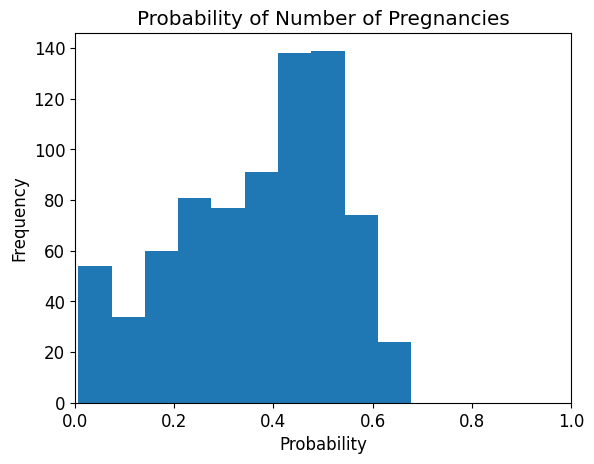

In [155]:
# plot histogram of predicted probabilities

plt.rcParams['font.size']=12

plt.hist(y_pred1, bins=10)

plt.title('Probability of Number of Pregnancies')

plt.xlim(0,1)

plt.xlabel('Probability')
plt.ylabel('Frequency')

The histogram plot shows the probability of how many times a certain number of pregnancies occur and that most people in the study have had 0 or 1 pregnancies. It is important to note that this data only applies to the population that is gathered in the dataset and may not be representative of the general population.

# **Conclusion**
Employing logistic regression alongside meticulous data wrangling proves to be a powerful approach in predictive analytics. Through data wrangling, we refine and prepare our datasets, ensuring they are robust and reliable for analysis. Logistic regression, with its ability to model binary outcomes, offers a straightforward yet effective method for predicting categorical variables. By combining these techniques, we not only gain insights into the underlying patterns within our data but also equip ourselves with the means to make informed decisions based on predictive outcomes. This synergy between data wrangling and logistic regression lays a solid foundation for extracting actionable insights and driving impactful results in various domains.